# SciANN-Regression.py

An illustrain to use SciANN simple linear and quadratic curve-fitting.

For additional details, please check our paper at: https://arxiv.org/abs/2005.08803 
    
Created by Ehsan Haghighat on 5/01/20.

In [1]:
# You need to have tensorflow, keras, and sciann installed in your system. 
# On google cloud, uncomment next line to install sciann. 

# !pip install sciann 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sciann as sn 

---------------------- SCIANN 0.6.3.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 


# SciANN for Linear Regression  

The objective is to fit NN on data generated from 
$$
y = 2x+1+\epsilon, \quad \epsilon \sim N(0,\sigma^2) = \sigma N(0,1)
$$

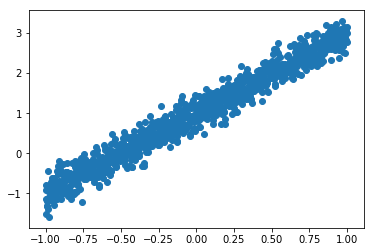

In [3]:
x_data = np.linspace(-1, 1, 1000)
y_data = 2*x_data + 1
y_data += 0.2*np.std(y_data)*np.random.randn(1000)

plt.scatter(x_data, y_data)
plt.show()

## Step 1
The first step is to define the approxmation using neural networks. The simplest neural network is a linear regression model, i.e., a network 
without any hidden layers:  

In [4]:
x = sn.Variable('x')
o = sn.Field('y')
y = sn.Functional(o, x)

You can check initial values of network weights and biasses as:

In [5]:
y.get_weights()

[[array([[-0.02533445]], dtype=float32), array([0.652505], dtype=float32)]]

You can eval a functional using the `eval' function:

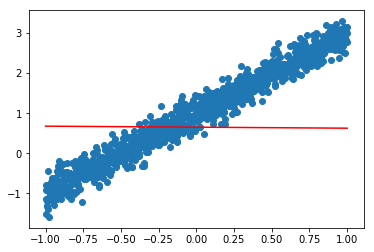

In [6]:
y_pred = y.eval(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')
plt.show()

## Step 2
The second step is the define the optimization model, i.e., main inputs of the network and targets (objtives). This is done using SciModel interface:

In [7]:
d1 = sn.Data(y)
m = sn.SciModel(x, d1)

Once the model is defined, we can use the `train' function to identify the parameters of the network: 

In [8]:
m.train(x_data, y_data, learning_rate=0.01)


Total samples: 1000 
Batch size: 64 
Total batches: 16 

Epoch 1/100
16/16 [==============================] - 0s 1ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.4023 - lr: 0.0100 - time: 0.1772
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.1467 - lr: 0.0100 - time: 0.1219
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.9478 - lr: 0.0100 - time: 0.1123
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.7908 - lr: 0.0100 - time: 0.1120
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.6557 - lr: 0.0100 - time: 0.1133
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.5490 - lr: 0.0100 - time: 0.1136
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - los

16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0548 - lr: 0.0050 - time: 0.1109
Epoch 58/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0547 - lr: 0.0050 - time: 0.1080
Epoch 59/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0542 - lr: 0.0050 - time: 0.1095
Epoch 60/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0546 - lr: 0.0050 - time: 0.1189
Epoch 61/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0545 - lr: 0.0050 - time: 0.1159
Epoch 62/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0549 - lr: 0.0050 - time: 0.1119
Epoch 63/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0541 - lr: 0.0050 - time: 0.1151
Epoch 64/100
16/16 [======

We can now re-evaluate the network as:

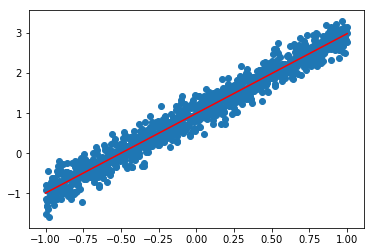

In [9]:
y_pred = y.eval(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')
plt.show()

The final values of weights and biases are obtained: 

In [10]:
y.get_weights()

[[array([[1.9879982]], dtype=float32), array([0.9979587], dtype=float32)]]

As you find, these are very close to their true values for data. 

# SciANN for Quadratic Regression 

As the second example, let us assume that we have a the following dataset: 
$$
y = 2x^2 -x + 1 + \epsilon, \quad \epsilon \sim N(0, \sigma^2)
$$

and we wish to perform a quadratic regression using neural networks. 

In [11]:
x_data = np.linspace(-1, 1, 1000)
y_data = 2*x_data**2 - x_data + 1 
y_data += 0.2*np.std(y_data)*np.random.randn(1000)
plt.scatter(x_data, y_data)

## Step 1

Again, we first need to define the approximation space, i.e., the quadratic model: 

In [12]:
x = sn.Variable('x')
x2 = sn.Variable('x2')
y = sn.Functional('y', [x, x2])

Initial state of the approximation can be evaluated as:

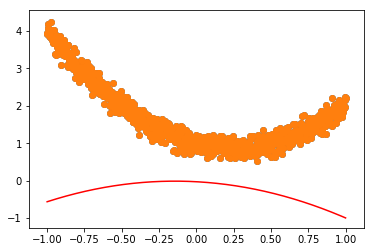

In [13]:
y_pred = y.eval([x_data, x_data**2])

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')
plt.show()

## Step 2

Defining the optimization model and training the network:

In [14]:
d1 = sn.Data(y)
m = sn.SciModel([x, x2], d1)
m.train([x_data, x_data**2], y_data, learning_rate=0.02)


Total samples: 1000 
Batch size: 64 
Total batches: 16 

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 3.8777 - lr: 0.0200 - time: 0.1763
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 2.3992 - lr: 0.0200 - time: 0.1220
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.3837 - lr: 0.0200 - time: 0.1157
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.7656 - lr: 0.0200 - time: 0.1123
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.4275 - lr: 0.0200 - time: 0.1176
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.2637 - lr: 0.0200 - time: 0.1090
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - los

16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0261 - lr: 0.0200 - time: 0.1100
Epoch 59/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0263 - lr: 0.0200 - time: 0.1149
Epoch 60/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0263 - lr: 0.0200 - time: 0.1160
Epoch 61/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0262 - lr: 0.0200 - time: 0.1094
Epoch 62/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0262 - lr: 0.0200 - time: 0.1083
Epoch 63/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0261 - lr: 0.0200 - time: 0.1103
Epoch 64/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 0.0262 - lr: 0.0200 - time: 0.1152
Epoch 65/100
16/16 [======

We can finally evaluate the network as: 


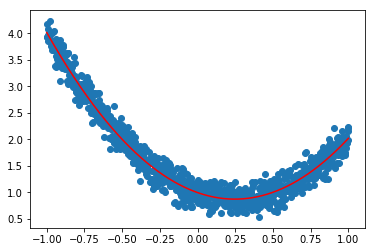

In [15]:
y_pred = y.eval([x_data, x_data**2])

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')
plt.show()

The weights and biasses of the network are obtained as: 

In [16]:
y.get_weights()

[[array([[-0.9977857],
         [ 2.0224469]], dtype=float32), array([0.9920667], dtype=float32)]]